In [3]:
import pandas as pd

In [4]:
stock = pd.read_csv('14장_data.csv')

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    899 non-null    object 
 1   GOOG    899 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.2+ KB


In [6]:
stock.head()

,Date,GOOG
0,2021-01-04,85.824677
1,2021-01-05,86.454369
2,2021-01-06,86.174797
3,2021-01-07,88.755127
4,2021-01-08,89.746346


In [7]:
stock.columns = ['ds', 'y']

In [9]:
stock.head()

,ds,y
0,2021-01-04,85.824677
1,2021-01-05,86.454369
2,2021-01-06,86.174797
3,2021-01-07,88.755127
4,2021-01-08,89.746346


In [10]:
from prophet import Prophet

In [11]:
Pp_stock = Prophet()

In [12]:
Pp_stock.fit(stock)

09:49:42 - cmdstanpy - INFO - Chain [1] start processing
09:49:45 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future_ds = Pp_stock.make_future_dataframe(periods = 100)
future_ds.tail()

,ds
994,2024-11-04
995,2024-11-05
996,2024-11-06
997,2024-11-07
998,2024-11-08


In [15]:
future_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      999 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [17]:
future_y = Pp_stock.predict(future_ds)

future_y[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
994,2024-11-04,194.743869,187.240563,202.567644
995,2024-11-05,194.901221,187.705170,202.792797
996,2024-11-06,195.152061,188.117730,202.700416
997,2024-11-07,195.505814,188.398736,202.961807
998,2024-11-08,195.943839,188.865602,203.312929


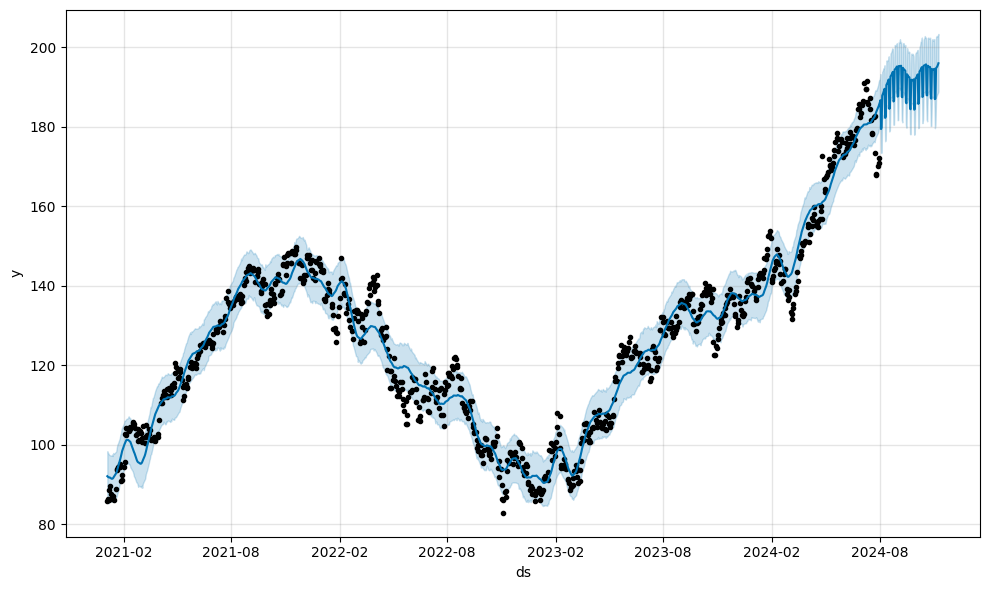

In [18]:
fig_trend = Pp_stock.plot(future_y)

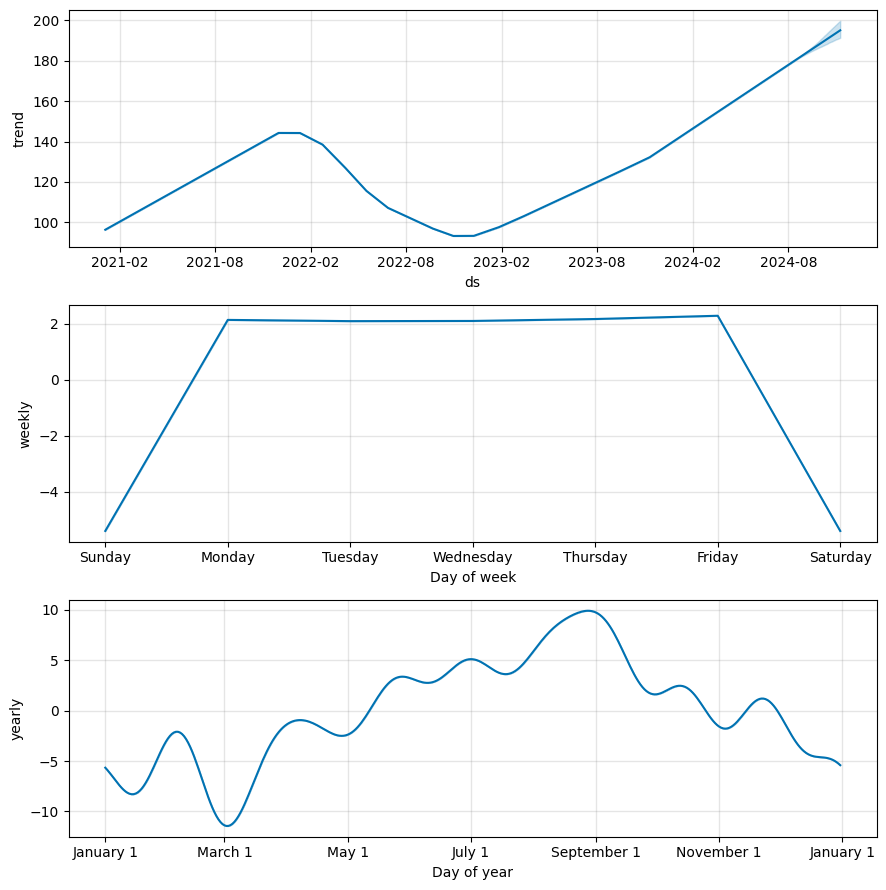

In [19]:
fig_components = Pp_stock.plot_components(future_y)

In [20]:
from prophet.plot import add_changepoints_to_plot

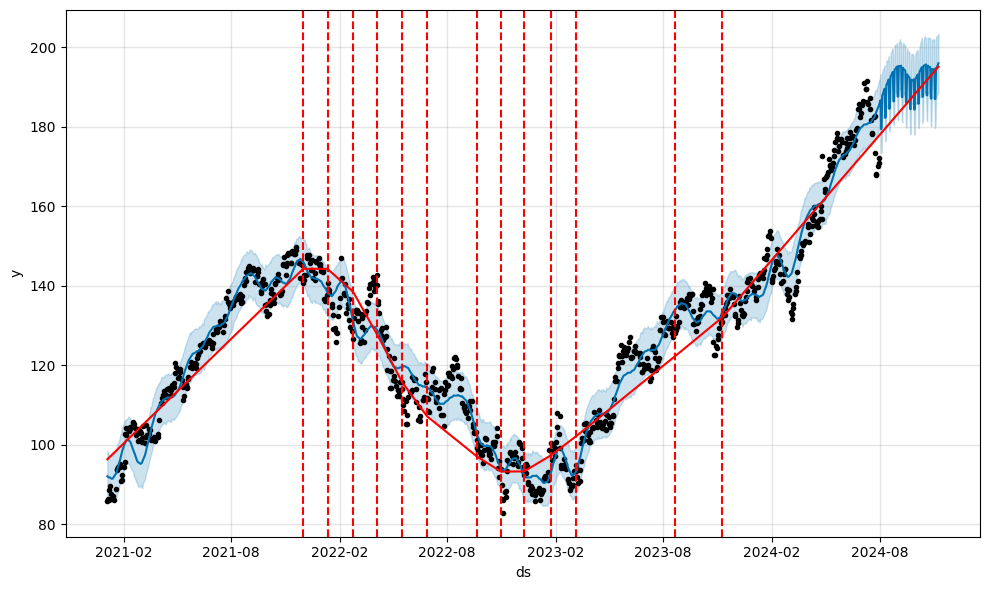

In [21]:
fig_trend = Pp_stock.plot(future_y)
fig_trend_changepoints = add_changepoints_to_plot(fig_trend.gca(), Pp_stock, future_y)

In [31]:
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objects as go


In [38]:
import plotly.graph_objects as go
import prophet.plot as prophet_plot
from prophet.plot import plot_plotly

# prophet.plot 모듈 안에 go를 주입해 줌
prophet_plot.go = go

# 예측 결과 플롯 그리기
plot_plotly(Pp_stock, future_y)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array(['2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
                          '2021-01-06T00:00:00.000000000', ..., '2024-07-29T00:00:00.000000000',
                          '2024-07-30T00:00:00.000000000', '2024-07-31T00:00:00.000000000'],
                         shape=(899,), dtype='datetime64[ns]'),
              'y': {'bdata': ('AAAAgMd0VUAAAABgFJ1VQAAAAOAvi1' ... 'AhRWVAAAAAYFtcZUAAAAAAZ4VlQA=='),
                    'dtype': 'f8'}},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array(['2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
                          '2021-01-06T00:00:00.000000000', ..., '2024-11-06T00:00:00.000000000',
                          '2024-11-07T00:00:00.000000000', '2024-11-08T00:00:00.000000000'],
                         shape=(999,), dtype='datetime64[ns]'),
              'y': {'bdata': ('MJw5u4G3VUBovoWMQm1VQAVonylmU1' ... 'iycsSDZ0BgzjxywoxnQBBJhAOzm2dA'),
                    'dtype': 'f8'}},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array(['2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
                          '2021-01-06T00:00:00.000000000', ..., '2024-11-06T00:00:00.000000000',
                          '2024-11-07T00:00:00.000000000', '2024-11-08T00:00:00.000000000'],
                         shape=(999,), dtype='datetime64[ns]'),
              'y': {'bdata': ('8K3nJt4HV0BOIpY9mP1WQPAs7Q569l' ... 'Vyrt1kaEAP5ZChL3BoQB+vp+0zfmhA'),
                    'dtype': 'f8'}},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array(['2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
                          '2021-01-06T00:00:00.000000000', ..., '2024-11-06T00:00:00.000000000',
                          '2024-11-07T00:00:00.000000000', '2024-11-08T00:00:00.000000000'],
                         shape=(999,), dtype='datetime64[ns]'),
              'y': {'bdata': ('+IJLgp6ZWEC8UjKotIFYQI2t/iJpc1' ... 'kuz2lWaUDcBA4fx15pQGsqfIMDamlA'),
                    'dtype': 'f8'}}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'visible': True},
                         'title': {'text': 'ds'},
                         'type': 'date'},
               'yaxis': {'title': {'text': 'y'}}}
})